# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "C:/Users/cynth/Module_5_Starter_Code/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "C:/Users/cynth/Module_5_Starter_Code/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

#mouse_study = pd.concat([mouse_metadata, study_results], axis=1)
#mouse_study

# Display the data table for preview
mouse_study.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mouse_study_df = len(mouse_study["Mouse ID"].unique())
mouse_study_df

249

In [4]:
#for student use
data_types = mouse_study.dtypes
data_types


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [5]:
#for student use
mouse_study["Mouse ID"].nunique()

249

In [6]:
mouse_study.duplicated().sum()

1

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']).sum()

5

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
mouse_study[mouse_study["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
g989_index = mouse_study[mouse_study["Mouse ID"] == "g989"].index
g989_index

Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [11]:
mouse_study.drop(g989_index, inplace=True)

In [12]:
## Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [108]:
# Checking the number of mice in the clean DataFrame.
mouse_study["Mouse ID"].nunique()

248

## Summary Statistics

In [13]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
## Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
## mean, median, variance, standard deviation, and SEM of the tumor volume. 
    #mouse_study.groupby('Drug Regimen') 
    #mouse_study
mean_df = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean_df.head(20)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [14]:
median = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median.head(20)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [15]:
variance = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variance.head(20)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [16]:
std = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [17]:
#SEM = sem(mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'], axis=1)
SEM = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
SEM.head(20)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [18]:
#mouse_study.groupby('Drug Regimen') 
#mouse_study["Mouse ID"].nunique()
drug_regimen = mouse_study.groupby('Drug Regimen')['Drug Regimen'].nunique()
drug_regimen

Drug Regimen
Capomulin    1
Ceftamin     1
Infubinol    1
Ketapril     1
Naftisol     1
Placebo      1
Propriva     1
Ramicane     1
Stelasyn     1
Zoniferol    1
Name: Drug Regimen, dtype: int64

In [19]:
type(drug_regimen)

pandas.core.series.Series

In [20]:
new_stats = pd.concat([drug_regimen, mean_df, median, variance, std, SEM], axis=1, keys=["Drug Regimen", "Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."])
new_stats.index.name = None
new_stats


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,1,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,1,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,1,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,1,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,1,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,1,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,1,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,1,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,1,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,1,53.236507,51.818479,48.533355,6.966589,0.516398


In [21]:
type(new_stats)

pandas.core.frame.DataFrame

In [22]:
type('Drug Regimen')

str

In [23]:
print(new_stats.index)

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object')


In [24]:
new_stats_rn = new_stats.rename(columns={'Drug Regimen': 'Remove'})
new_stats_rn

,Remove,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,1,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,1,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,1,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,1,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,1,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,1,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,1,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,1,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,1,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,1,53.236507,51.818479,48.533355,6.966589,0.516398


In [25]:
print(new_stats_rn.index.name)

None


In [26]:
new_stats_rn.index.rename('Drug Regimen', inplace=True)
new_stats_rn

,Remove,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,,
Capomulin,1,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,1,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,1,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,1,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,1,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,1,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,1,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,1,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,1,54.233149,52.431737,59.450562,7.710419,0.573111


In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
final_stats = new_stats_rn.drop('Remove', axis=1)
final_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Using the aggregation method, produce the same summary statistics in a single line

In [112]:
summary_stats = final_stats.agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
mean,50.975982,49.902123,47.858440,6.821103,0.502785
median,53.060651,51.819532,46.192684,6.794337,0.530365
var,31.598895,22.140931,256.269612,1.478889,0.010707
std,5.621289,4.705415,16.008423,1.216096,0.103473
sem,1.777608,1.487983,5.062308,0.384563,0.032721


## Bar and Pie Charts

In [28]:
# PRE-WORK Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_study.groupby('Drug Regimen') 
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
study_counts = mouse_study.groupby('Drug Regimen')[["Mouse ID", "Timepoint"]].value_counts().reset_index(name='count')
study_counts

,Drug Regimen,Mouse ID,Timepoint,count
0,Capomulin,b128,0,1
1,Capomulin,b128,5,1
2,Capomulin,j119,45,1
3,Capomulin,l509,15,1
4,Capomulin,l509,10,1
...,...,...,...,...
1875,Zoniferol,k894,10,1
1876,Zoniferol,k894,5,1
1877,Zoniferol,k894,0,1
1878,Zoniferol,k754,20,1


In [30]:
grouped_data = study_counts.groupby('Drug Regimen')['count'].sum()
grouped_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: count, dtype: int64

<Axes: xlabel='Drug Regimen'>

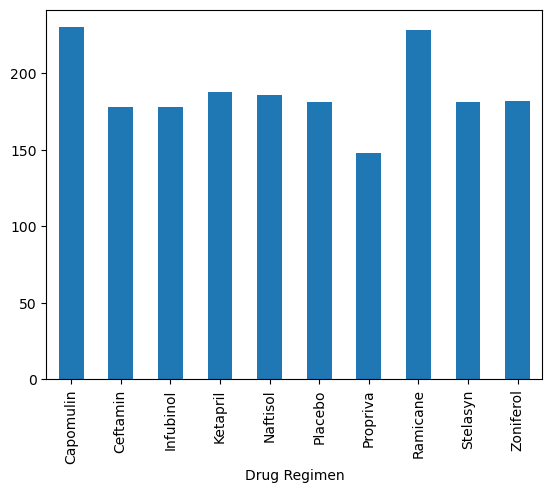

In [31]:
# FINAL Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#grouped_data_sorted = grouped_data.sort_values(by='count', ascending=False)
grouped_data.plot(kind='bar', x='Drug Regimen', y='count')

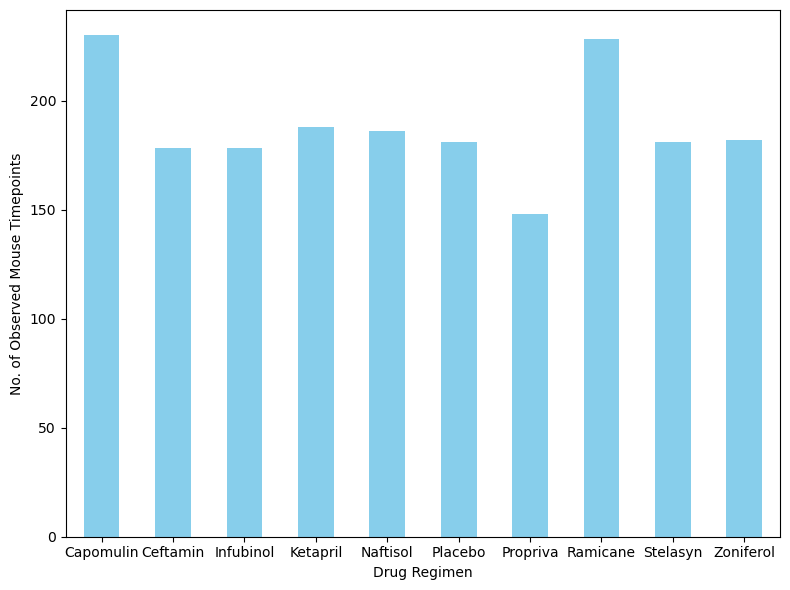

In [32]:
# FINAL Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8,6))
grouped_data.plot(kind='bar', color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('No. of Observed Mouse Timepoints')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
# PRE-WORK Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study.groupby('Sex') 
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
study_counts_sex = mouse_study.groupby('Sex')["Mouse ID"].nunique()
df_unique_counts = pd.DataFrame(study_counts_sex)
df_unique_counts

,Mouse ID
Sex,
Female,123
Male,125


In [35]:
df_unique_counts.dtypes

Mouse ID    int64
dtype: object

In [36]:
df_unique_counts.index

Index(['Female', 'Male'], dtype='object', name='Sex')

<Axes: ylabel='Mouse ID'>

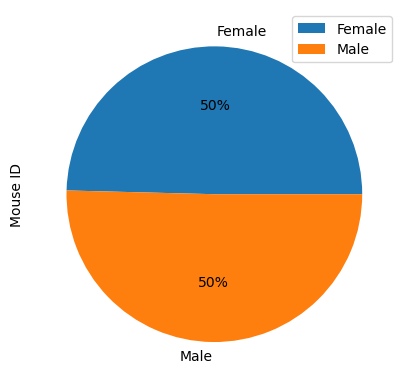

In [37]:
# FINAL Generate a pie plot showing the distribution of female versus male mice using Pandas
df_unique_counts.plot(kind='pie', y='Mouse ID', autopct='%1.0f%%')

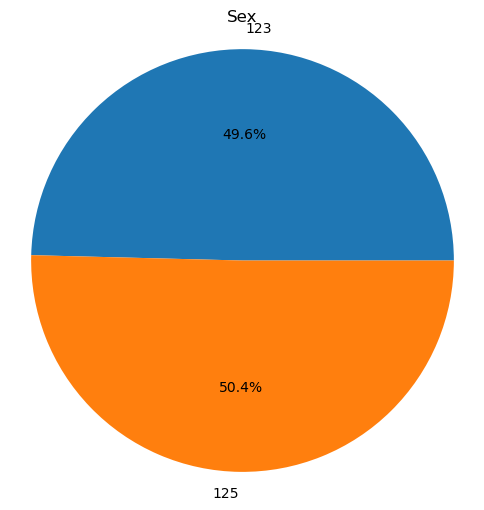

In [107]:
# FINAL Generate a pie plot showing the distribution of female versus male mice using pyplot
# Extract data for the pie chart
pie_data = df_unique_counts['Mouse ID']  # Values for pie chart slices
pie_labels = df_unique_counts['Mouse ID']  # Labels for pie chart slices

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(pie_data, labels=pie_labels, autopct="%1.1f%%")  # Customize options

# Optional customizations
plt.title('Sex')
plt.axis('equal') 

plt.show()

## Quartiles, Outliers and Boxplots

In [105]:
#mouse_study

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_by = mouse_study.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
max_by.head(20)

Mouse ID  Drug Regimen
a203      Infubinol       45
a251      Infubinol       45
a262      Placebo         45
a275      Ceftamin        45
a366      Stelasyn        30
a401      Zoniferol       45
a411      Ramicane        45
a444      Ramicane        45
a457      Ketapril        10
a492      Stelasyn        45
a520      Ramicane        45
a577      Infubinol       30
a644      Ramicane        45
a685      Infubinol       45
a699      Propriva        45
a788      Zoniferol       30
a818      Naftisol        45
a897      Placebo         45
a963      Stelasyn        45
b128      Capomulin       45
Name: Timepoint, dtype: int64

In [41]:
# Putting last (greatest) timepoint for each mouse into a data frame
max_by_df = max_by.to_frame()
max_by_df.head()

,,Timepoint
Mouse ID,Drug Regimen,
a203,Infubinol,45
a251,Infubinol,45
a262,Placebo,45
a275,Ceftamin,45
a366,Stelasyn,30


In [42]:
# EXTRA STEP
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_mouse_study = mouse_study[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
new_mouse_study

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1888,z969,Naftisol,25,63.145652
1889,z969,Naftisol,30,65.841013
1890,z969,Naftisol,35,69.176246
1891,z969,Naftisol,40,70.314904


In [43]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_by_df.merge(new_mouse_study, on=['Mouse ID', 'Timepoint'])
merged_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
243,z435,10,Propriva,48.710661
244,z578,45,Ramicane,30.638696
245,z581,45,Infubinol,62.754451
246,z795,45,Naftisol,65.741070


In [44]:
#Put treatments into a list for for loop (and later for plot labels)
#BEGIN
drug_regimen_lst = merged_df.groupby('Drug Regimen')['Drug Regimen'].nunique()
drug_regimen_lst

Drug Regimen
Capomulin    1
Ceftamin     1
Infubinol    1
Ketapril     1
Naftisol     1
Placebo      1
Propriva     1
Ramicane     1
Stelasyn     1
Zoniferol    1
Name: Drug Regimen, dtype: int64

In [45]:
if isinstance(drug_regimen_lst, list):
  print("Data is a list")

# Check if it's a pandas Series
elif isinstance(drug_regimen_lst, pd.Series):
  print("Data is a pandas Series")

# Check if it's a pandas DataFrame (optional)
elif isinstance(drug_regimen_lst, pd.DataFrame):
  print("Data is a pandas DataFrame")

# If none of the above, it's likely another data type
else:
  print("Data is not a list, Series, or DataFrame")

Data is a pandas Series


In [46]:
#Put treatments into a list for for loop (and later for plot labels)
drug_regimen.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [47]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = list(drug_regimen_lst.index.values)
regimen_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [48]:
if isinstance(regimen_list, list):
  print("Data is a list")

# Check if it's a pandas Series
elif isinstance(regimen_list, pd.Series):
  print("Data is a pandas Series")

# Check if it's a pandas DataFrame (optional)
elif isinstance(regimen_list, pd.DataFrame):
  print("Data is a pandas DataFrame")

# If none of the above, it's likely another data type
else:
  print("Data is not a list, Series, or DataFrame")

Data is a list


In [49]:
#Put treatments into a list for for loop (and later for plot labels)
#END
data = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
condition1 = lambda x: x in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_list = [item for item in data if condition1(item)]
print(filtered_list)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']


In [50]:
type(filtered_list)

list

In [51]:
# Create empty list to fill with tumor vol data (for plotting)
list_vol = []
print(list_vol)

[]


In [52]:
# tumor vol data
list_vol = merged_df['Tumor Volume (mm3)'].tolist()
list_vol

[67.97341878,
 65.52574285,
 70.71762058,
 62.99935619,
 63.44068627,
 66.79415599,
 38.4076183,
 43.0475426,
 49.78341894,
 60.12201052,
 38.81036633,
 57.03186187,
 32.97852192,
 66.08306589,
 62.19141437,
 60.41370908,
 74.99776443,
 72.25596306,
 62.76509317,
 38.98287774,
 55.74514628,
 45.0,
 56.05774909,
 73.05136339,
 38.93963263,
 55.74282869,
 72.55523894,
 72.2267309,
 67.94212107,
 65.81516535,
 64.57522157,
 36.3213458,
 74.04039018,
 38.34200823,
 61.84005842,
 58.04656941,
 69.04284082,
 33.39765251,
 69.82314577,
 62.17570465,
 65.41595451,
 60.96971133,
 64.18322918,
 45.0,
 47.47464468,
 37.31123552,
 60.23373278,
 63.1056963,
 73.21293851,
 55.1389525,
 62.43540402,
 68.3597767,
 40.65900627,
 49.98830246,
 57.74875831,
 48.19457788,
 60.91876652,
 47.03309963,
 48.72207785,
 73.32443228,
 45.0,
 30.48598484,
 52.07951009,
 71.90511721,
 37.07402422,
 68.16319517,
 40.1592203,
 69.87225079,
 61.77496268,
 70.49278763,
 29.12847181,
 51.06041924,
 74.10408567,
 55.455

In [53]:
row_count_list = len(list_vol)
print(row_count_list)

248


In [119]:
reg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = merged_df[(merged_df['Drug Regimen'] == reg[0]) | 
                            (merged_df['Drug Regimen'] == reg[1]) |
                            (merged_df['Drug Regimen'] == reg[2]) |
                            (merged_df['Drug Regimen'] == reg[3])]
filtered_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
3,a275,45,Ceftamin,62.999356
6,a411,45,Ramicane,38.407618
7,a444,45,Ramicane,43.047543
...,...,...,...,...
238,y769,45,Ceftamin,68.594745
239,y793,45,Capomulin,31.896238
240,y865,45,Ceftamin,64.729837
244,z578,45,Ramicane,30.638696


In [120]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = filtered_df['Tumor Volume (mm3)'].quantile(0.25)
Q3 = filtered_df['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = filtered_df[(filtered_df['Tumor Volume (mm3)'] < lowerfence) | (filtered_df['Tumor Volume (mm3)'] > upperfence)] #??

upperfence = Q3 + (1.5 * IQR)
lowerfence = Q1 - (1.5*IQR)
print("This is IQR:", IQR)
print("This is Upperfence:", upperfence)
print("This is Lowerfence:", lowerfence)
print("This is Q1:", Q1)
print("This is Q3:", Q3)
print(outliers) #??

   

This is IQR: 22.742517952499995
This is Upperfence: 94.04403868374999
This is Lowerfence: 3.0739668737500097
This is Q1: 37.1877438025
This is Q3: 59.930261755
    Mouse ID  Timepoint Drug Regimen  Tumor Volume (mm3)
0       a203         45    Infubinol           67.973419
13      a685         45    Infubinol           66.083066
27      c139         45    Infubinol           72.226731
78      i386         40    Infubinol           67.289621
94      k210         45     Ceftamin           68.923185
96      k403         45     Ramicane           22.050126
97      k483         45    Infubinol           66.196912
106     l471         45     Ceftamin           67.748662
174     s185         45    Capomulin           23.343598
209     w151         45     Ceftamin           67.527482
233     y163         45    Infubinol           67.685569
238     y769         45     Ceftamin           68.594745


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
filtered_df = new_mouse_study[new_mouse_study['Drug Regimen'] == 'Capomulin']
filtered_df_sort = filtered_df.sort_values(by='Mouse ID')
filtered_df_sort_b128 = filtered_df_sort[filtered_df_sort["Mouse ID"].str.contains("b128")] 
filtered_df_sort_b128

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
309,b128,Capomulin,45,38.982878
307,b128,Capomulin,35,37.967644
306,b128,Capomulin,30,40.605335
305,b128,Capomulin,25,43.262145
304,b128,Capomulin,20,42.731552
303,b128,Capomulin,15,43.784893
302,b128,Capomulin,10,43.270852
301,b128,Capomulin,5,45.651331
308,b128,Capomulin,40,38.379726
300,b128,Capomulin,0,45.000000


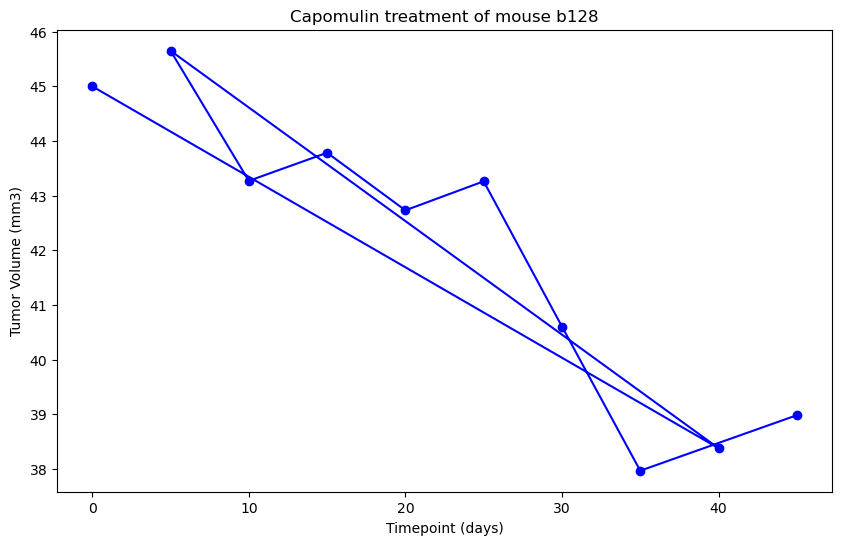

In [122]:
#filtered_df_sort_b128.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')
plt.figure(figsize=(10,6))
plt.plot(filtered_df_sort_b128['Timepoint'], filtered_df_sort_b128['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(False)
plt.show()

In [100]:
#x_values = filtered_df_sort_b128['Timepoint']
#y_values = filtered_df_sort_b128['Tumor Volume (mm3)']
#plt.scatter(x_values,y_values)
#plt.xlabel('Timepoint (days)')
#plt.ylabel('Tumor Volume (mm3)')
#plt.show()

In [99]:
#x_values = filtered_df_sort_b128['Timepoint']
#y_values = filtered_df_sort_b128['Tumor Volume (mm3)']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.xlabel('Timepoint (days)')
#plt.ylabel('Tumor Volume (mm3)')
#plt.show()

In [73]:
# PRE-STEPS: Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

In [89]:
mouse_study_i = mouse_study.set_index("Mouse ID")
#mouse_study_i2 = mouse_study_i.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_study_idf = mouse_study_i[mouse_study_i['Drug Regimen'] == 'Capomulin']
mouse_study_idf

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
i557,Capomulin,Female,1,24,45,47.685963,1
r157,Capomulin,Male,22,25,0,45.000000,0
r157,Capomulin,Male,22,25,5,45.597064,0


In [91]:
mouse_study_idf_drop = mouse_study_idf.drop(['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'], axis=1)
mouse_study_idf_drop

,Drug Regimen,Weight (g),Tumor Volume (mm3)
Mouse ID,,,
s185,Capomulin,17,45.000000
s185,Capomulin,17,43.878496
s185,Capomulin,17,37.614948
s185,Capomulin,17,38.177232
s185,Capomulin,17,36.866876
...,...,...,...
i557,Capomulin,24,47.685963
r157,Capomulin,25,45.000000
r157,Capomulin,25,45.597064


In [94]:
# LAST STEPS: Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_by_group = mouse_study_idf_drop.groupby(['Mouse ID', 'Drug Regimen'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
average_by_group.head()

,,Weight (g),Tumor Volume (mm3)
Mouse ID,Drug Regimen,,
b128,Capomulin,22.0,41.963636
b742,Capomulin,21.0,40.083699
f966,Capomulin,17.0,36.505973
g288,Capomulin,19.0,41.990097
g316,Capomulin,22.0,44.613344


<function matplotlib.pyplot.show(close=None, block=None)>

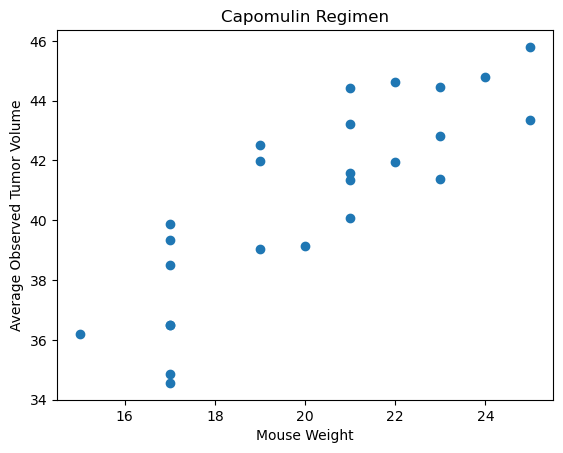

In [97]:
x_values = average_by_group['Weight (g)']
y_values = average_by_group['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Observed Tumor Volume')
plt.title('Capomulin Regimen')
plt.show

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

<function matplotlib.pyplot.show(close=None, block=None)>

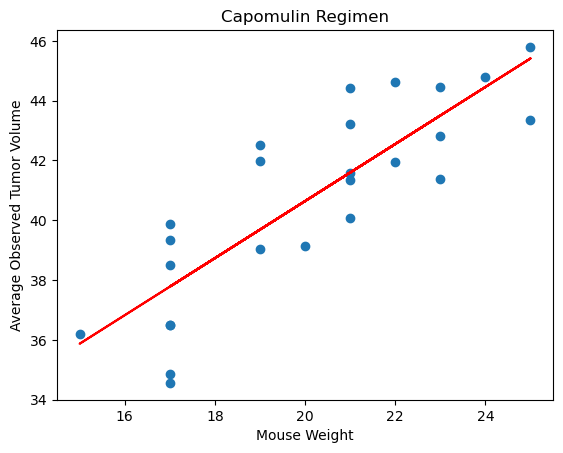

In [98]:
x_values = average_by_group['Weight (g)']
y_values = average_by_group['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Observed Tumor Volume')
plt.title('Capomulin Regimen')
plt.show